<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Frecuentismo_Bayesianismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FRECUENTISMO Y BAYESIANISMO***

La **estadìstica** tiene **dos diferentes** tipos de **enfoques**: el ***frecuentismo*** y el ***bayesianismo***.


Definiciòn de probabilidad de cada tipo:


*   Frecuentista:

  *   La probabilidad solo tiene sentido en tèrminos de un caso lìmite de mediciones repetidas (cada resultado serà ligeramente diferente debido al error estadìstico del dispositivo de mediciòn).
  *   Las probabilidades estan fundamentalmente relacionadas con las frecuencias de los eventos.


*   Bayesiano

    *   La probabilidad se extiende para cubrir los grados de certeza sobre las afirmaciones (esa probabilidad puede estimarse a partir de frecuencias en el lìmite de un gran nùmero de experimentos repetidos).
    *   La probabilidad es una declaraciòn del conocimiento del investigador sobre cual es el flujo verdadero.

    *   Las probabilidades estan fundamentalmente relacionadas con su propio conocimiento sobre el evento (conocimiento basado en informaciòn previa y datos disponibles).





## *Ejemplo: Mediciones del flujo de fotones*

Imaginemos que apuntamos un telescopio al cielo y observamos la luz que proviene de una sola estrella. Para simplificar, supondremos que el flujo fotonico real de la estrella es constante con el tiempo, es decir, que tiene un valor fijo F: tambien ignoraremos efectos como los errores sistemàticos del fondo del ciaelo. Supondremos que se realizan una serie de N mediciones, donde la i-esima mediciòn informa el flujo observado F y el error e.

Dado este conjunto de mediciones D={$F_{i},e_{i}$}, ¿cuàl es nuestra mejor estimacion del flujo verdadero F?

**Generación de datos del flujo de fotones:**

Primero, generamos un conjunto de datos simulado para ilustrar ambos enfoques.

Primeras mediciones de flujo (F) y errores (e):
F1 = 1028.76, e1 = 28.75
F2 = 988.63, e2 = 29.83
F3 = 991.14, e3 = 23.59
F4 = 997.40, e4 = 34.92
F5 = 1010.67, e5 = 24.62


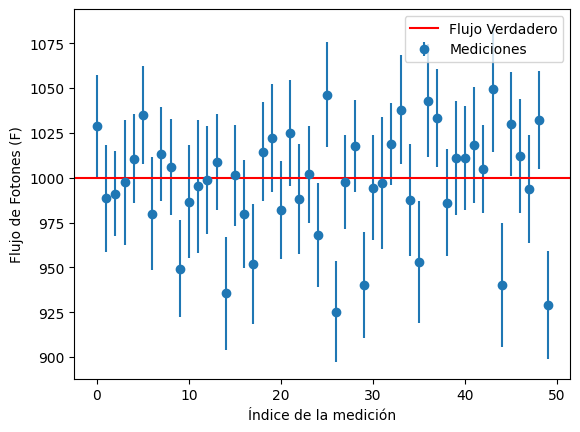

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Establecemos la semilla para reproducibilidad
np.random.seed(2)
# Número de mediciones
N = 50
# Errores de medición, distribuidos normalmente con media 30 y desviación estándar 3
e = np.random.normal(30, 3, N)
# Flujo de fotones simulado, con un valor verdadero F = 1000 (unidades arbitrarias)
F_true = 1000
F = np.random.normal(F_true, e)
# Mostramos las primeras mediciones
print("Primeras mediciones de flujo (F) y errores (e):")
for i in range(5):
    print(f"F{i+1} = {F[i]:.2f}, e{i+1} = {e[i]:.2f}")
# Graficamos las mediciones
plt.errorbar(range(N), F, yerr=e, fmt='o', label='Mediciones')
plt.axhline(y=F_true, color='r', linestyle='-', label='Flujo Verdadero')
plt.xlabel('Índice de la medición')
plt.ylabel('Flujo de Fotones (F)')
plt.legend()
plt.show()

**Enfoque frecuentista:**


El enfoque frecuentista utiliza el máximo de la verosimilitud (MLE, por sus siglas en inglés) para estimar el flujo verdadero.

In [2]:
# Calculamos los pesos, wi = 1 / e_i^2
w = 1. / e**2
# Estimación del flujo utilizando una media ponderada
F_hat = np.sum(w * F) / np.sum(w)
# Error estimado en F_hat
sigma_F = np.sqrt(1 / np.sum(w))
# Resultado
print(f"Estimación del flujo (F_hat) con enfoque frecuentista: {F_hat:.2f} ± {sigma_F:.2f}")

Estimación del flujo (F_hat) con enfoque frecuentista: 998.65 ± 4.11


**Enfoque bayesiano:**


En el enfoque bayesiano, utilizamos el Teorema de Bayes para calcular la distribución posterior del flujo de fotones. En este caso, asumimos un prior uniforme (una distribución plana) para el flujo de fotones.

In [5]:
# Importar las librerías necesarias
import numpy as np
from scipy.stats import norm

# Definición de la función de verosimilitud
def likelihood(F, F_obs, e_obs):
    return np.prod(norm.pdf(F_obs, F, e_obs))

# Datos de entrada: observaciones y errores
# Ejemplo de datos; reemplaza con tus propios datos
F_obs = np.array([1000, 1020, 980])  # Observaciones
e_obs = np.array([5, 5, 5])           # Errores estándar

# Usamos una malla de posibles valores de F
F_values = np.linspace(900, 1100, 1000)

# Calculamos la verosimilitud para cada valor de F
likelihoods = np.array([likelihood(F, F_obs, e_obs) for F in F_values])

# Normalizamos para obtener la posterior
posterior = likelihoods / np.sum(likelihoods)

# Estimación del flujo como el valor de F que maximiza la posterior
F_bayes_hat = np.sum(F_values * posterior)

# Desviación estándar de la posterior
sigma_F_bayes = np.sqrt(np.sum(posterior * (F_values - F_bayes_hat)**2))

# Resultado
print(f"Estimación del flujo (F_bayes_hat) con enfoque bayesiano: {F_bayes_hat:.2f} ± {sigma_F_bayes:.2f}")

Estimación del flujo (F_bayes_hat) con enfoque bayesiano: 1000.00 ± 2.89


**Comparación de resultados:**


Finalmente, podemos comparar los resultados obtenidos por los dos enfoques, frecuentista y bayesiano.

In [6]:
# Imprimir resultados comparativos
print("\nResultados comparativos:")
print(f"Enfoque frecuentista: F_hat = {F_hat:.2f} ± {sigma_F:.2f}")
print(f"Enfoque bayesiano: F_bayes_hat = {F_bayes_hat:.2f} ± {sigma_F_bayes:.2f}")


Resultados comparativos:
Enfoque frecuentista: F_hat = 998.65 ± 4.11
Enfoque bayesiano: F_bayes_hat = 1000.00 ± 2.89


**Cálculo de Probabilidades en Bayes**

La expresión bayesiana para una probabilidad marginal, como $ P(B \mid D) $, se obtiene integrando la distribución conjunta $P(B, p \mid D)$ sobre $ p $.

Al usar la regla de Bayes y propiedades de la probabilidad, se reescribe como:

$P(B \mid D) = \int_{-\infty}^{\infty} P(B \mid p, D) \cdot P(p \mid D) \, dp$

Esta es una forma de calcular la probabilidad posterior, que en este caso se evalúa numéricamente.

**Cálculo en el Enfoque Bayesiano**

Usando los términos de la verosimilitud $P(B \mid p, D) $ y $ P(D \mid p) $, y un prior uniforme para $p$, se obtiene una integral:

$
P(B \mid D) = \frac{\int_0^1 (1 - p)^6 p^5 \, dp}{\int_0^1 (1 - p)^3 p^5 \, dp}
$

Esta integral se puede calcular usando la función Beta, lo que da un valor de $ P(B \mid D) = 0.091 $, con probabilidades de 10 a 1 en contra de que Bob gane.



**Simulación Empírica**

La simulación de múltiples juegos confirma que la probabilidad bayesiana de que Bob gane es 10 a 1 en contra de él, mientras que un enfoque frecuentista básico da 18 a 1 en contra de Bob. Esto muestra que el enfoque frecuentista no captura adecuadamente la incertidumbre asociada con el parámetro  $ p $.

**Interpretación de Intervalos de Confianza vs. Regiones de Credibilidad**

La diferencia entre intervalos de confianza (CI) y regiones de credibilidad (CR) es clave. Mientras que:

Un **intervalo de confianza frecuentista** responde a la** probabilidad de que un intervalo, construido a partir de repetidas muestras, contenga el valor verdadero del parámetro.**

Una **región de credibilidad bayesiana** responde a la **probabilidad de que un parámetro dado, dado los datos y el prior, esté dentro de un intervalo específico.**


Aunque en muchos casos **las diferencias entre CI y CR no son evidentes**, en situaciones de distribución no gaussiana, esta distinción puede llevar a interpretaciones erróneas.

# **Ejemplo del Modelo Exponencial Truncado (Jaynes)**

En este ejemplo, se estima el parámetro $\theta $ de un modelo de fallas exponenciales. La interpretación y el cálculo de los límites de incertidumbre de $\theta$ muestra cómo el enfoque frecuentista y bayesiano pueden dar resultados significativamente diferentes debido a la interpretación fundamentalmente distinta de la probabilidad.

**Bayesianismo en la Práctica**

Aunque el enfoque bayesiano ofrece una interpretación más natural y directa de los parámetros, computacionalmente puede ser intensivo, especialmente en problemas de alta dimensionalidad. Aquí es donde métodos como Markov Chain Monte Carlo (MCMC) son útiles para calcular distribuciones posteriores en espacios de parámetros complejos.

Calcula $𝑃 (𝐵∣𝐷)$ mediante la función Beta, que es la forma cerrada para resolver la integral en el contexto bayesiano.

In [7]:
from scipy.special import beta
import numpy as np
# Parámetros de la simulación
p = np.linspace(0, 1, 1000)  # Valores de probabilidad p
D = 5  # Número de victorias de Alice
B = 3  # Número de victorias de Bob
# Función de verosimilitud: dado p, ¿cuál es la probabilidad de que Bob gane?
P_B_given_p = (1 - p) ** 3  # P(B|p, D) = (1-p)^3
# Verosimilitud de los datos D: P(D|p)
P_D_given_p = p**5 * (1 - p)**3  # P(D|p) = p^5 * (1-p)^3
# Prior uniforme para p
P_p = 1  # Priori uniforme
# Calculamos la integral usando la función Beta para P(B|D)
numerador = beta(6, 6)  # Integración del numerador
denominador = beta(3, 6)  # Integración del denominador
P_B_given_D = numerador / denominador
print(f"La probabilidad de que Bob gane (P(B|D)) es: {P_B_given_D:.3f}")

La probabilidad de que Bob gane (P(B|D)) es: 0.061


Se presentan tres paquetes de Python para implementar el enfoque bayesiano: $emcee$, $PyMC$ y $PyStan$. Cada uno usa un algoritmo de MCMC diferente Affine Invariant Ensemble MCMC, Metropolis-Hastingsy Hamiltonian MCMC, respectivamente. A pesar de sus diferencias en el algoritmo, los tres paquetes producen resultados similares para un modelo de regresión lineal.

**Comparación**

Se comparan los intervalos de confianza frecuentistas con las regiones de credibilidad bayesianas. Aunque los resultados son similares, el enfoque bayesiano se considera más flexible y natural, especialmente cuando se trata de manejar parámetros de molestia $nuisance parameters$ mediante marginalización.